# Customer Segmentation using Unsupervised Learning

 
**Problem Statement** : RBL’s marketing department collects various customer specific data of the credit card holders. They need a mechanism to segment the customer based on underlying characteristics and form market clusters which will be easy for them to target and provide product ideas to the management. Currently these tasks are performed manually by trusting the judgment of experts in the field. These can lead to human error, biased decision and other factors which may not be helpful to create a customer cluster that actually exist. They want to design a system that would automate this process and help the different stakeholders to make informed business decision.
 


1. BALANCE : Balance amount left in customers account to make purchases
1. BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1
1. PURCHASES : Amount of purchases made from account
1. PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1
1. ONEOFF_PURCHASES : Maximum purchase amount done in one-go
1. ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go
1. INSTALLMENTS_PURCHASES : Amount of purchase done in installment
1. CASH_ADVANCE : Cash in advance given by the user
1. PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done
1. CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
1. CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
1. PURCHASES_TRX : Number of purchase transactions made
1. CREDIT_LIMIT : Limit of Credit Card for user
1. PAYMENTS : Amount of Payment done by user
1. MINIMUM_PAYMENTS : Minimum amount of payments made by user
1. PRCFULLPAYMENT : Percent of full payment paid by user
1. TENURE : Tenure of credit card service for user

In [36]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.style as style
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [37]:
# read dataset
df = pd.read_csv('data_credit_card_customer_seg.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [20]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [3]:
# Columns contain in dataset
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
# Rows and columns
df.shape

(8950, 18)

In [10]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [21]:
# Find missing value
df.isnull().sum() 

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

1. List atleast three approaches on Data preprocessing
2. Atleast 3 observations on data provided
3. Collaborate with team on providing a consolidated output

## Observations

 1. 8950 rows and 18 columns
 2. 313(3.49%) data were missing in MINIMUM_PAYMENTS column and 1 data in CREDIT_LIMIT column.
 3. 15 columns is of float datatype and only 3 columns were int.


## Approaches on Data preprocessing

1. Data cleaning - handle all missing values
2. Feature selection - select the data based on correlation
3. Data normalization

## Data Preparation & Cleaning

In [38]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Note : there are many outliers (look at the max value) but we can't drop them because they may contain important information, so we treat the outliers as extreme values.

In [3]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [23]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [24]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [25]:
# drop unnecessary columns
df = df.drop(columns=['CUST_ID'],axis=1)

Customer ID seems to be an unique id for each customer and hence won't play any role in determining the cluster.

## EDA

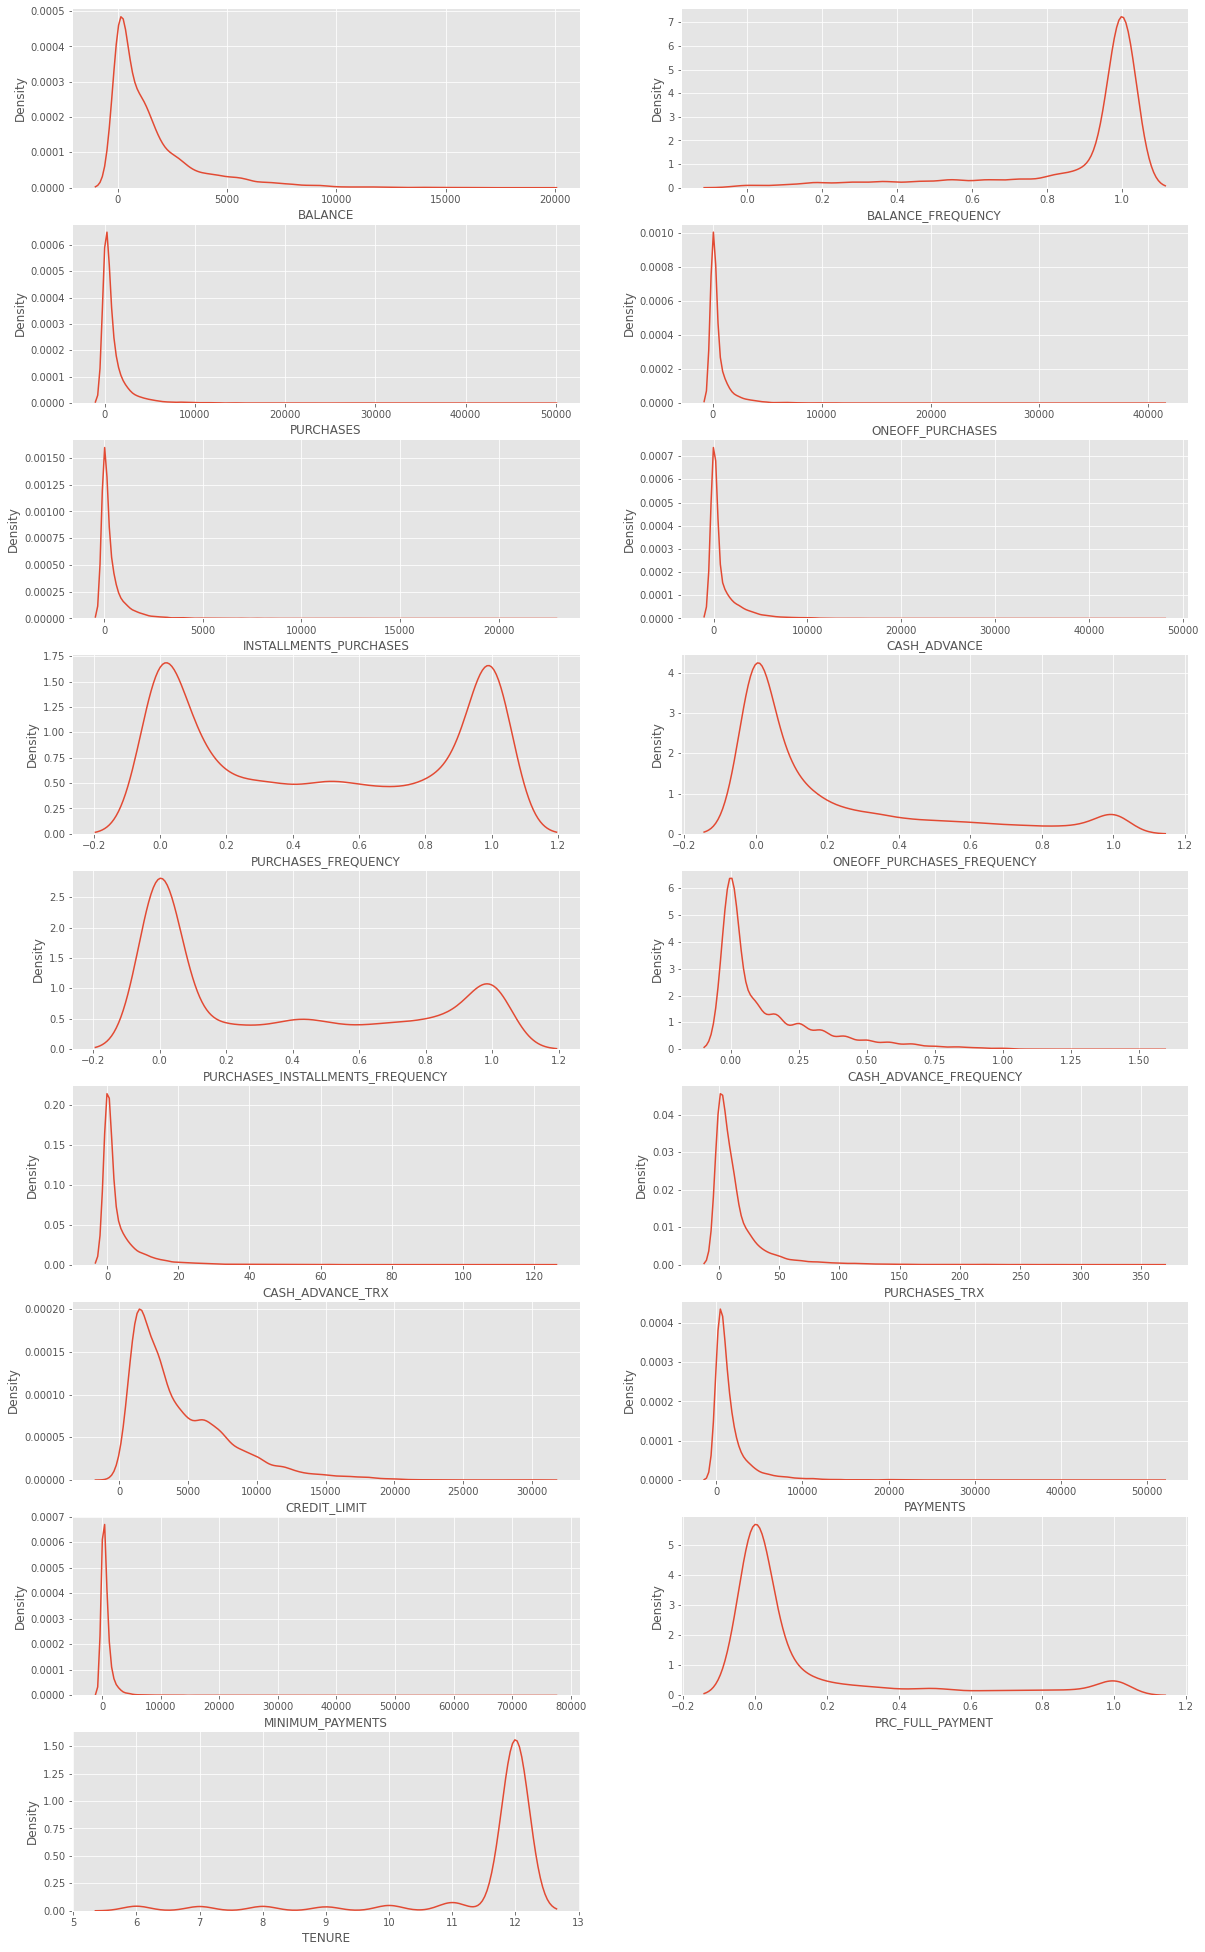

In [26]:
# visualize distribution of the data using kernal density plot
style.use('ggplot')
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

There is a lot of skewness and they are varied. It is kind of expected from datasets like these as there will always be a few customers who do very high amount of transactions.

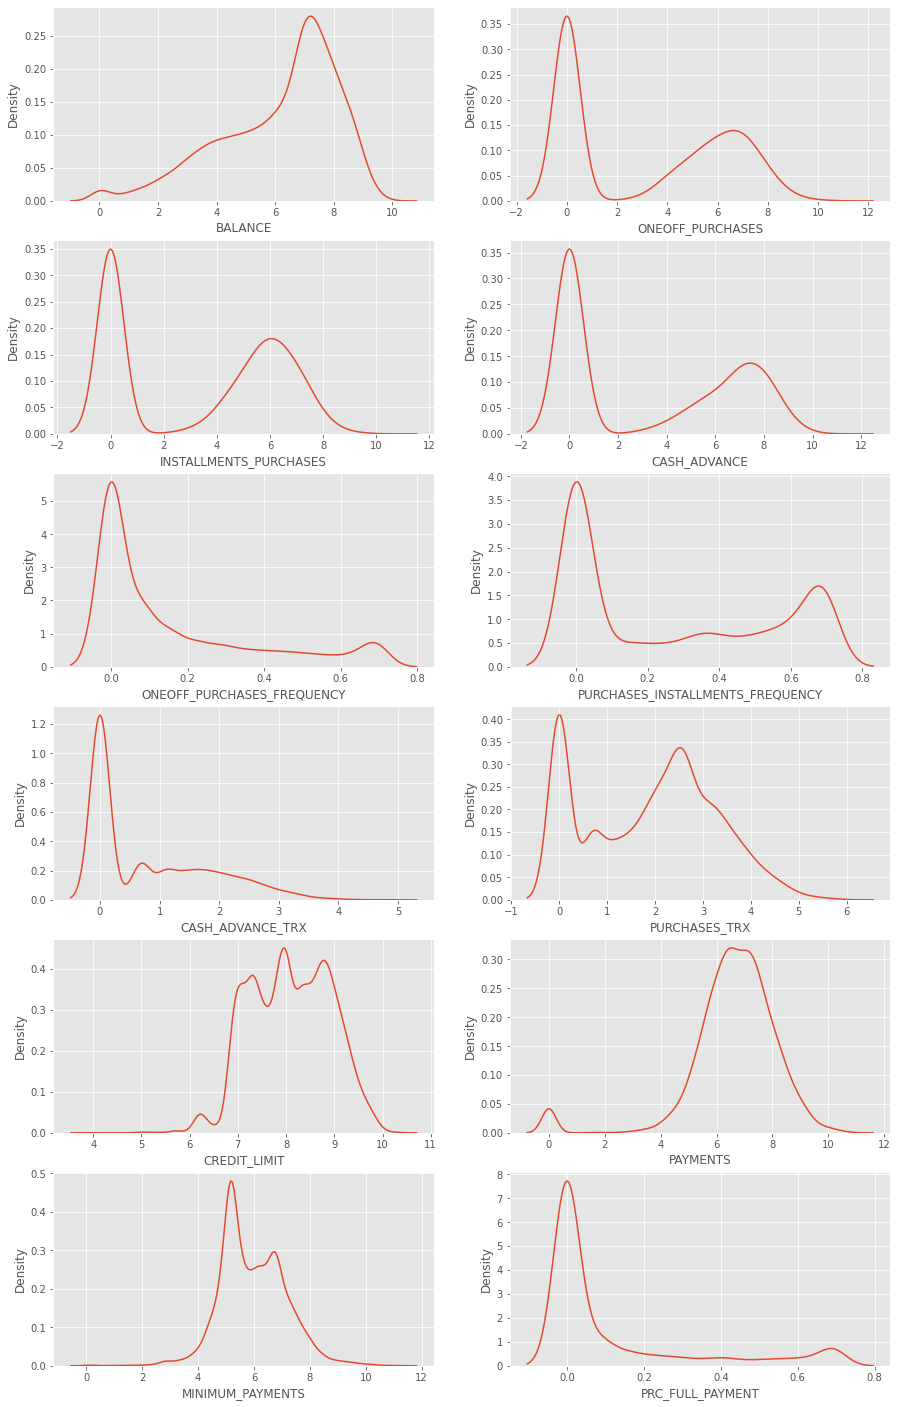

In [27]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
        'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX',
        'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

for col in cols:
    df[col] = np.log(1 + df[col])
    
plt.figure(figsize=(15,25))
for i, col in enumerate(cols):
    ax = plt.subplot(6, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
plt.show()

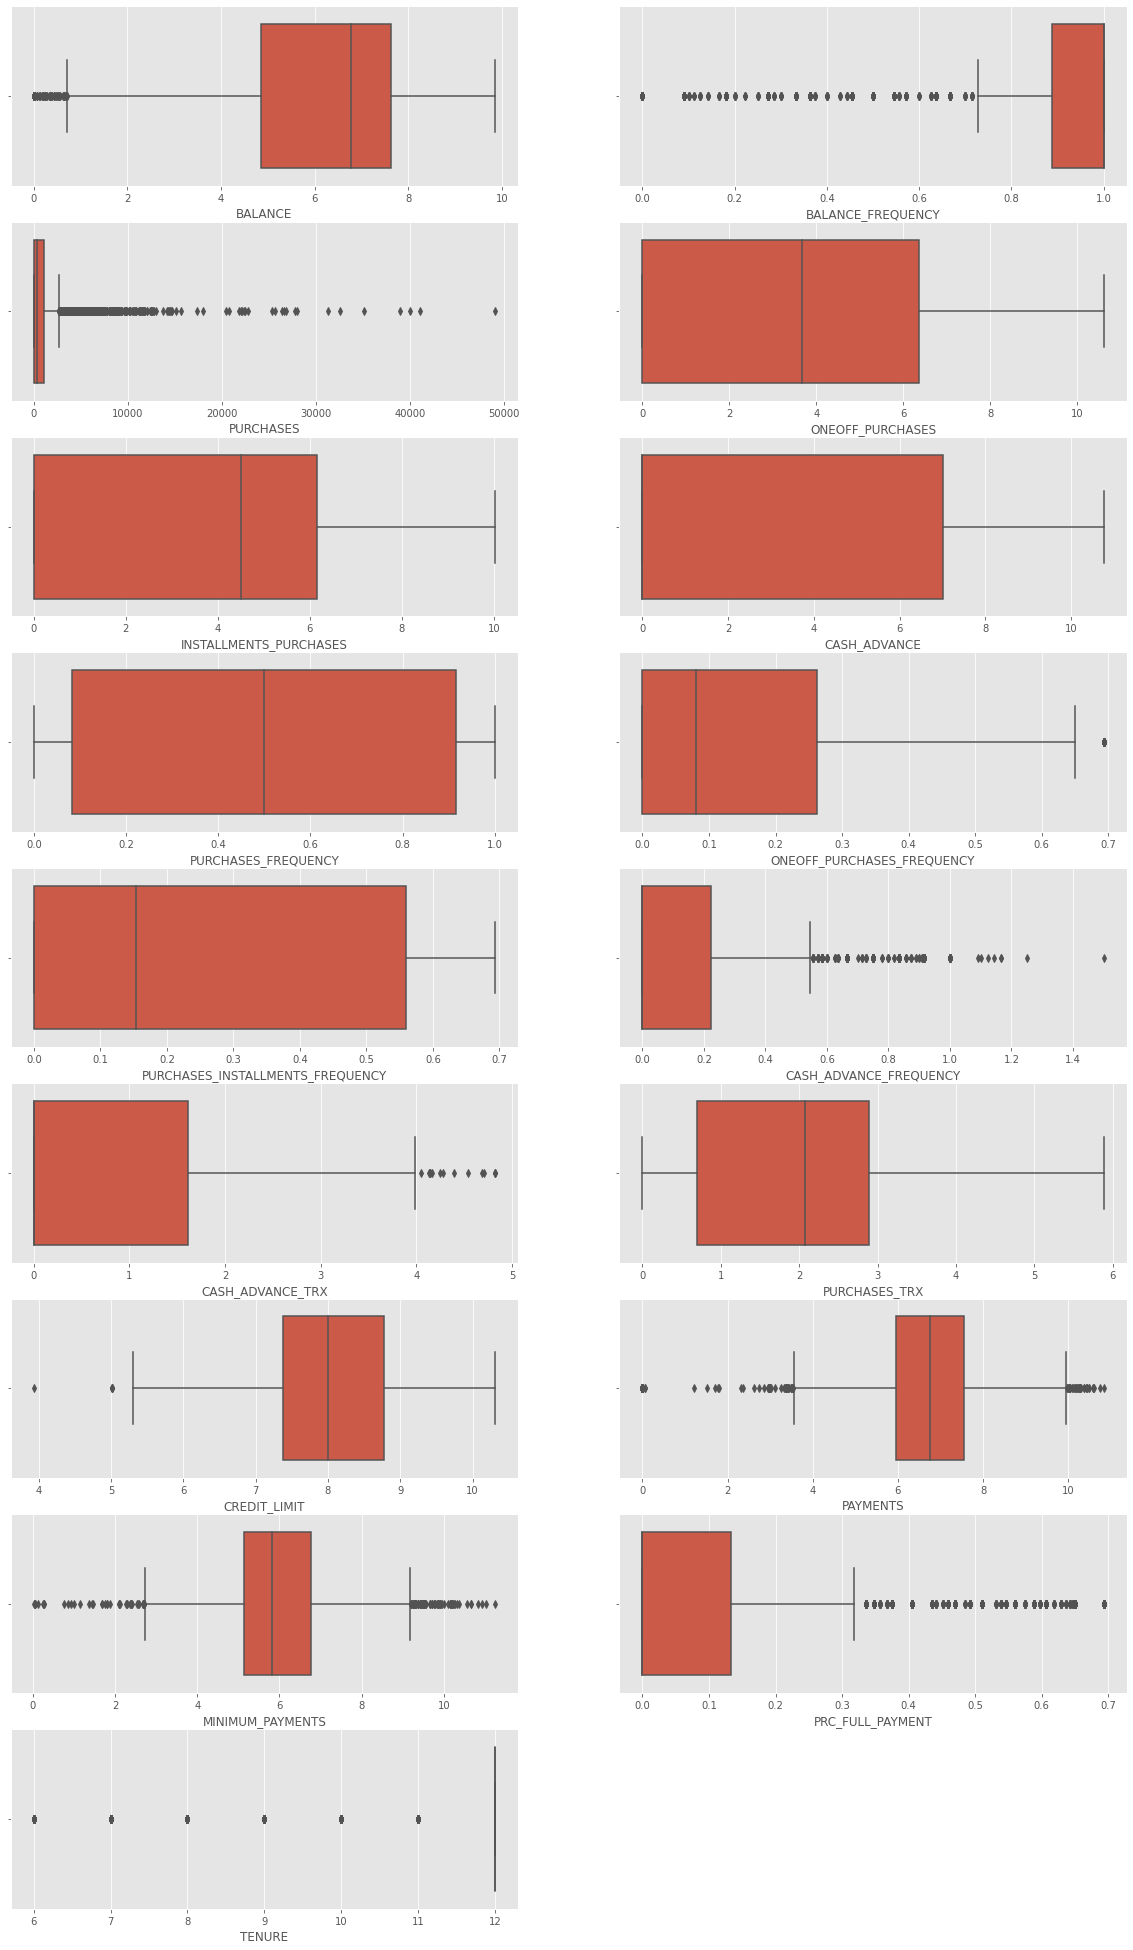

In [28]:
# outlier detection
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.boxplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [29]:
# Correlation
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.652592,0.171612,0.180434,-0.110924,0.521648,-0.093945,0.155496,-0.116462,0.451885,0.504146,-0.017178,0.299732,0.429075,0.713633,-0.422927,0.073873
BALANCE_FREQUENCY,0.652592,1.000000,0.133674,0.140453,0.112687,0.164510,0.229715,0.202687,0.167986,0.191873,0.193654,0.200958,0.094894,0.322262,0.353874,-0.096509,0.119776
PURCHASES,0.171612,0.133674,1.000000,0.481995,0.375059,-0.155387,0.393017,0.496939,0.313875,-0.120143,-0.137559,0.529841,0.295543,0.348400,0.121790,0.180132,0.086288
ONEOFF_PURCHASES,0.180434,0.140453,0.481995,1.000000,0.161434,-0.190146,0.373634,0.813939,0.097157,-0.116687,-0.144803,0.574393,0.284795,0.267027,0.049628,0.041784,0.091953
INSTALLMENTS_PURCHASES,-0.110924,0.112687,0.375059,0.161434,1.000000,-0.394318,0.794784,0.191380,0.905443,-0.288378,-0.335621,0.782683,0.106516,0.165432,-0.047503,0.281549,0.099394
CASH_ADVANCE,0.521648,0.164510,-0.155387,-0.190146,-0.394318,1.000000,-0.432610,-0.184706,-0.368510,0.770260,0.898398,-0.430773,0.119456,0.182519,0.396909,-0.325736,-0.100459
PURCHASES_FREQUENCY,-0.093945,0.229715,0.393017,0.373634,0.794784,-0.432610,1.000000,0.500105,0.866309,-0.308478,-0.367151,0.909024,0.112576,0.175997,-0.063762,0.312659,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.155496,0.202687,0.496939,0.813939,0.191380,-0.184706,0.500105,1.000000,0.143362,-0.111085,-0.145991,0.621698,0.289775,0.274090,0.030242,0.142205,0.081559
PURCHASES_INSTALLMENTS_FREQUENCY,-0.116462,0.167986,0.313875,0.097157,0.905443,-0.368510,0.866309,0.143362,1.000000,-0.270853,-0.315215,0.769837,0.053019,0.129631,-0.048316,0.263038,0.071668
CASH_ADVANCE_FREQUENCY,0.451885,0.191873,-0.120143,-0.116687,-0.288378,0.770260,-0.308478,-0.111085,-0.270853,1.000000,0.912540,-0.302996,0.139855,0.193640,0.347628,-0.252631,-0.133372


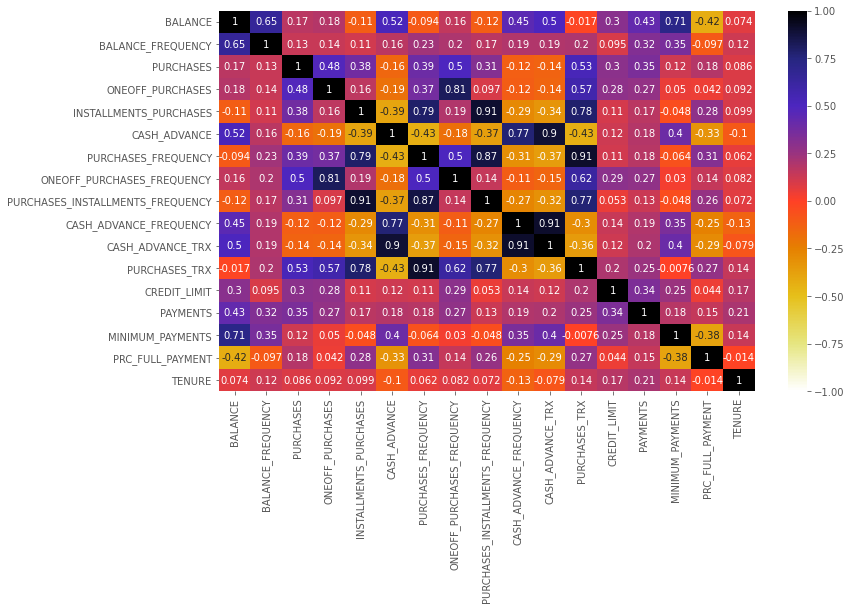

In [30]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1,cmap=plt.cm.CMRmap_r)
plt.show()

In [31]:
# with the following we can select highly correlated features
# it will remove the first feature that is correlated with any other features

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: #we are interested in absolute coeff value
                colname = corr_matrix.columns[i]   #getting the name of the colummns
                col_corr.add(colname)
    return col_corr

In [32]:
corr_features = correlation(df,0.8)
len(set(corr_features))

4

In [35]:
print('These are the highly correlated feature more than 80%')
print(corr_features)

These are the highly correlated feature more than 80%
{'PURCHASES_INSTALLMENTS_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX'}
